# Gradient Checking



# Adding Previous Model and data

In [1]:
import numpy as np

# load the text file into an array
train_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_x.npy')
test_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_x.npy')
cv_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_x.npy')

train_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_y.npy')
test_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_y.npy')
cv_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_y.npy')


In [2]:
from dnn_app_utils_v3 import *

In [3]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0318, num_iterations = 500, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [4]:
n_1=32
alpha=0.0373917182

In [5]:
n_x = train_set_x.shape[0]

layers_dims = [n_x, n_1, 4, 1] #  4-layer model

Cost after iteration 0: 0.692474
Cost after iteration 100: 0.659311
Cost after iteration 200: 0.648730
Cost after iteration 300: 0.630714
Cost after iteration 400: 0.646042


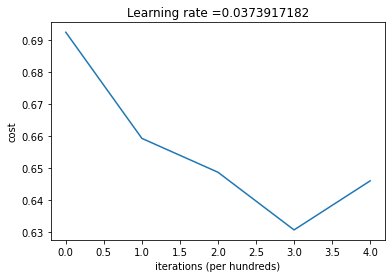

In [6]:
parameters = L_layer_model(train_set_x, train_set_y.reshape(1, -1), 
                           layers_dims, learning_rate = alpha, num_iterations = 500, print_cost = True)

In [7]:
X = train_set_x
Y = train_set_y
parameters

{'W1': array([[ 0.01893912, -0.00658534, -0.00524851, ..., -0.01480856,
         -0.00343404, -0.00576381],
        [ 0.0140128 ,  0.01108747,  0.00423321, ...,  0.0055438 ,
         -0.0016089 , -0.01772652],
        [-0.00196307,  0.00548584,  0.00395184, ..., -0.01603017,
          0.00218838,  0.00474529],
        ...,
        [-0.0211464 ,  0.0003351 ,  0.00891222, ...,  0.01797098,
          0.0007018 , -0.01208007],
        [ 0.01692769,  0.02460921, -0.00475794, ..., -0.0040709 ,
         -0.00197291, -0.00354192],
        [ 0.0053072 ,  0.0076439 ,  0.00205667, ...,  0.00159498,
          0.01401833, -0.01150636]]),
 'b1': array([[-5.36737014e-03],
        [-1.28405955e-03],
        [-1.12102416e-04],
        [-1.69636256e-03],
        [-4.77031693e-03],
        [-1.02165618e-02],
        [ 1.10902521e-02],
        [ 1.73636259e-02],
        [-7.28698938e-04],
        [-5.90897487e-03],
        [-9.90197772e-03],
        [-9.66757344e-03],
        [ 6.86467064e-04],
        [ 

In [8]:
# Packages
import numpy as np
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

In [9]:
def forward_propagation_n(X, Y, parameters):
   

    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [10]:
def backward_propagation_n(X, Y, cache):

    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) * 2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 4./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [11]:
#take a look
parameters_values, keys = dictionary_to_vector(parameters)
parameters_values

array([[ 0.01893912],
       [-0.00658534],
       [-0.00524851],
       ...,
       [-0.67306628],
       [ 0.41618142],
       [ 0.01853306]])

In [12]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):

    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        print(i)
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i] + epsilon                                    # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus)) # Step 3

        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i] - epsilon                                    # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus)) # Step 3                              
        
        
        # Compute gradapprox[i]
        gradapprox[i] = (J_plus[i]-J_minus[i])/(2*epsilon)

    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad-gradapprox)                                           # Step 1'
    denominator = np.linalg.norm(grad)+np.linalg.norm(gradapprox)                                         # Step 2'
    difference = numerator /denominator                                           # Step 3'
    ### END CODE HERE ###

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [13]:
#example

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

0


ValueError: shapes (5,4) and (7938,4799) not aligned: 4 (dim 1) != 7938 (dim 0)

In [14]:
vector_to_dictionary(parameters_values)

{'W1': array([[ 0.01893912, -0.00658534, -0.00524851, -0.01196816],
        [ 0.00927844, -0.02589804,  0.01977668, -0.00898884],
        [ 0.00340231, -0.00218398,  0.01638447, -0.02310488],
        [-0.00261039, -0.00406979,  0.01304422, -0.01153279],
        [-0.00163551, -0.00939223,  0.00109609,  0.00675665]]),
 'b1': array([[-0.01205605],
        [ 0.01271026],
        [ 0.00944078],
        [ 0.00502803],
        [ 0.01031472]]),
 'W2': array([[-0.0077414 , -0.00121588, -0.01040581, -0.00314208,  0.00608345],
        [-0.00811791, -0.00530927, -0.0081558 , -0.00884946, -0.00752012],
        [ 0.00036799, -0.01155443,  0.00319779,  0.01948672,  0.0089202 ]]),
 'b2': array([[-0.00178255],
        [-0.00938061],
        [-0.00802661]]),
 'W3': array([[ 0.01907527,  0.00102544, -0.00748061]]),
 'b3': array([[0.0011299]])}

In [136]:
parameters_values.shape

(254185, 1)